<a href="https://colab.research.google.com/github/Flock1/cs480student/blob/main/Copy_of_CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

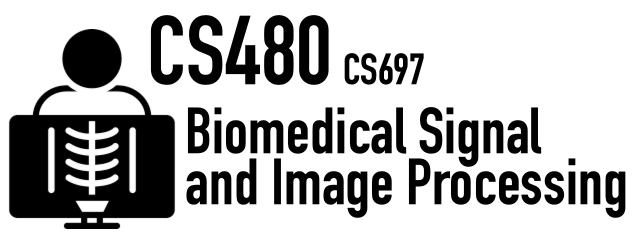
#Assignment 4

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [ ]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
# we are using mahotas again, so lets install it!
!pip install mahotas

In [ ]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier
import random

**Task 1:** Download, extract, and load the data! [15 Points]

In [ ]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.
!wget https://cs480.org/data/xray.zip

--2022-04-04 00:13:35--  https://cs480.org/data/xray.zip
Resolving cs480.org (cs480.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to cs480.org (cs480.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64445812 (61M) [application/zip]
Saving to: ‘xray.zip.1’

xray.zip.1          100%[===================>]  61.46M   194MB/s    in 0.3s    

2022-04-04 00:13:36 (194 MB/s) - ‘xray.zip.1’ saved [64445812/64445812]



In [ ]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [ ]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [ ]:
# TODO: Please display this image and print the dimensions!

In [ ]:
# TODO: YOUR CODE

(1858, 2090)


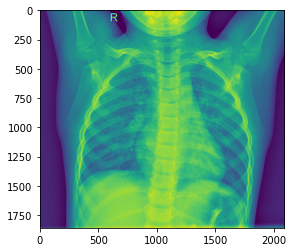

In [ ]:
matplotlib.pyplot.imshow(img)
print(img.shape)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [ ]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) YOUR ANSWER
'''Resize the image to 300 X 300'''
# TODO: Operation 2) YOUR ANSWER
'''Change the axes of the image. It has added the number of images that are present in each folder as the first dimension of the dataset, which we are probably going to use for training purposes.'''

'Change the axes of the image. It has added the number of images that are present in each folder as the first dimension of the dataset, which we are probably going to use for training purposes.'

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [ ]:
# TODO: YOUR CODE

In [ ]:
normal_imgs = [mh.imread(NORMAL_DIR+normal_files[i]) for i in random.sample(range(0,len(normal_files)),5)]
pnemonia_imgs = [mh.imread(PNEUMONIA_DIR+pneumonia_files[i]) for i in random.sample(range(0,len(pneumonia_files)),5)] 
images = normal_imgs+pnemonia_imgs

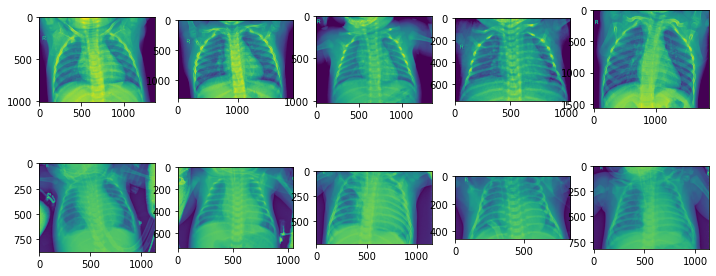

In [ ]:
rows = 2
cols = 5
fig = matplotlib.pyplot.figure(figsize(12,5))
for j in range(0,rows*cols):
  fig.add_subplot(rows,cols,j+1)
  plt.imshow(images[j])

**Task 3:** Setup training and testing data. [15 Points]

In [ ]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [ ]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [ ]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
training_target = list(np.zeros(TRAINING_COUNT, dtype=int))+list(np.ones(TRAINING_COUNT, dtype=int))
# TODO

In [ ]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [ ]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
testing_target = list(np.zeros(TESTING_COUNT, dtype=int))+list(np.ones(TESTING_COUNT, dtype=int))
# TODO

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [ ]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [ ]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [ ]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [ ]:
# TODO: YOUR ANSWER
'''
Random FOrest is a classification technique that uses decision trees as the base but also incorporates certain stochiasticity and randomness of decision trees in the process. They help reduce overfitting and bias because of the randomness 
compared to decision trees. 
'''

'\nRandom FOrest is a classification technique that uses decision trees as the base but also incorporates certain stochiasticity and randomness of decision trees in the process. They help reduce overfitting and bias because of the randomness \ncompared to decision trees. \n'

In [ ]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.9

In [ ]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [ ]:
'''
88-91% accuracy on image dataset is pretty good. Mature Deep Learning models are able to achieve >95% accuracy but conisdering computational cost, 88% accuracy on this dataset is really good. 
'''

'\n88% accuracy on image dataset is pretty good. Mature Deep Learning models are able to achieve >95% accuracy but conisdering computational cost, 88% accuracy on this dataset is really good. \n'

In [ ]:
# TODO: YOUR ANSWER

**Bonus:** Let's take a closer look! [33 Points]

In [ ]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

In [ ]:
predictions = clf.predict(testing_data)

In [ ]:
count=0
idx = []
for i,data in enumerate(predictions):
  if(predictions[i]!=testing_target[i]):
    count+=1
    idx.append(i)
    print(i)

4
31
37
41
44
52
57
78


In [ ]:
images = []
for i in idx:
  img = np.reshape(testing_data[i], (300,300))
  images.append(img)

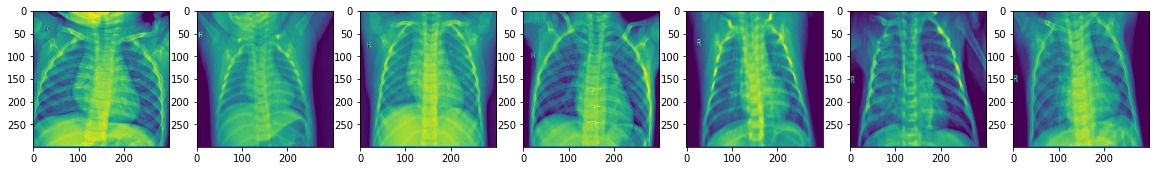

In [ ]:
rows = 1
cols = count
fig = matplotlib.pyplot.figure(figsize(20,10))
for j in range(0,rows*cols):
  fig.add_subplot(rows,cols,j+1)
  plt.imshow(images[j])

In [ ]:
# TODO: YOUR CODE AND YOUR ANSWER
'''
From the images, we can see that the pneumonia images don't seem to be as foggy around the lungs area as shown above. After multiple training, I realized that some images showed up multiple times as
misclassified. These include image index 4, 31, 37, 41 and 44. Some of these images are routinely misclassified by the random forest. 
'''

In [ ]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [ ]:
# TODO: YOUR ANSWER
'''
One way to increase accuracy is to get rid of noise. We see that a lot useless data is present in the form of right lung. Cropping will definitely help getting rid of this noise. 
Another way tro increase accuracy is to clearly specify the pneumonia parts. We saw above that a misclassification was happening because normal and pneumonia images look similar. So we need to data around 
what really classifies image as pneumonia. 
'''

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw